In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:
import plotly.express as px

In [ ]:
dataset

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [ ]:
dataset_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
fig = px.line(dataset_train,x = 'Date',y = 'Open')
fig.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
##Creating a data structure with 60 timesteps
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train , y_train = np.array(X_train),np.array(y_train)

In [ ]:
##Reshaping
X_train  = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [ ]:
regressor = Sequential()
##1st layer+dropout regularization
regressor.add(LSTM(units = 50,return_sequences=True,input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))



In [ ]:
##2nd layer +dropout regularization
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

##3rd layer + dropout regularisation
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

##4th LSTM layer
regressor.add(LSTM(units = 50,return_sequences=False))
regressor.add(Dropout(0.2))

In [ ]:
##Adding output layer
regressor.add(Dense(units= 1))

In [ ]:
#Compiling the RNN
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 100,batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 96ms/step - loss: 0.0243
Epoch 2/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0038
Epoch 13/100
38/38 [====

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
fig = px.line(dataset_test,x = 'Date',y = 'Open')
fig.show()

In [ ]:
##Prediction
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test  = np.array(X_test)

##Reshaping
X_test  = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
predicted_stock_price

array([[786.0494 ],
       [783.4249 ],
       [783.882  ],
       [785.1858 ],
       [788.51965],
       [794.4771 ],
       [799.8599 ],
       [802.17896],
       [802.88983],
       [802.9361 ],
       [802.7348 ],
       [802.3065 ],
       [801.87836],
       [802.18805],
       [802.9398 ],
       [807.5622 ],
       [814.3402 ],
       [821.66003],
       [825.66437],
       [821.65796]], dtype=float32)

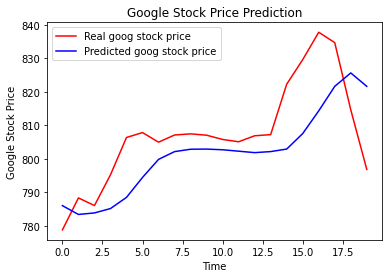

In [ ]:
plt.plot(real_stock_price, color = 'red',label = 'Real goog stock price')
plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted goog stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()